In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import folium

In [3]:
file_path = "data_jobs.csv"
data_jobs_df = pd.read_csv(file_path)

In [4]:
data_jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [8]:
data_jobs_df.head(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,NaN,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,NaN,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
7,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Full-time,True,Romania,2023-12-07 13:40:49,False,False,Romania,NaN,NaN,NaN,Zitec,"['sql', 'nosql', 'gcp', 'azure', 'aws', 'bigqu...","{'cloud': ['gcp', 'azure', 'aws', 'bigquery', ..."
8,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,NaN,NaN,NaN,Hempel,"['excel', 'powerpoint', 'power bi']","{'analyst_tools': ['excel', 'powerpoint', 'pow..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,NaN,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."


In [5]:
# Creating a copy of the original dataframe to focus on non-salary analysis
df_non_salary = data_jobs_df.copy()

# Trend Analysis 1: Top Job Titles
top_job_titles = df_non_salary['job_title_short'].value_counts()
top_job_titles


job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

C:\Users\alex_\AppData\Local\Temp\ipykernel_7112\2203303594.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette=colors)


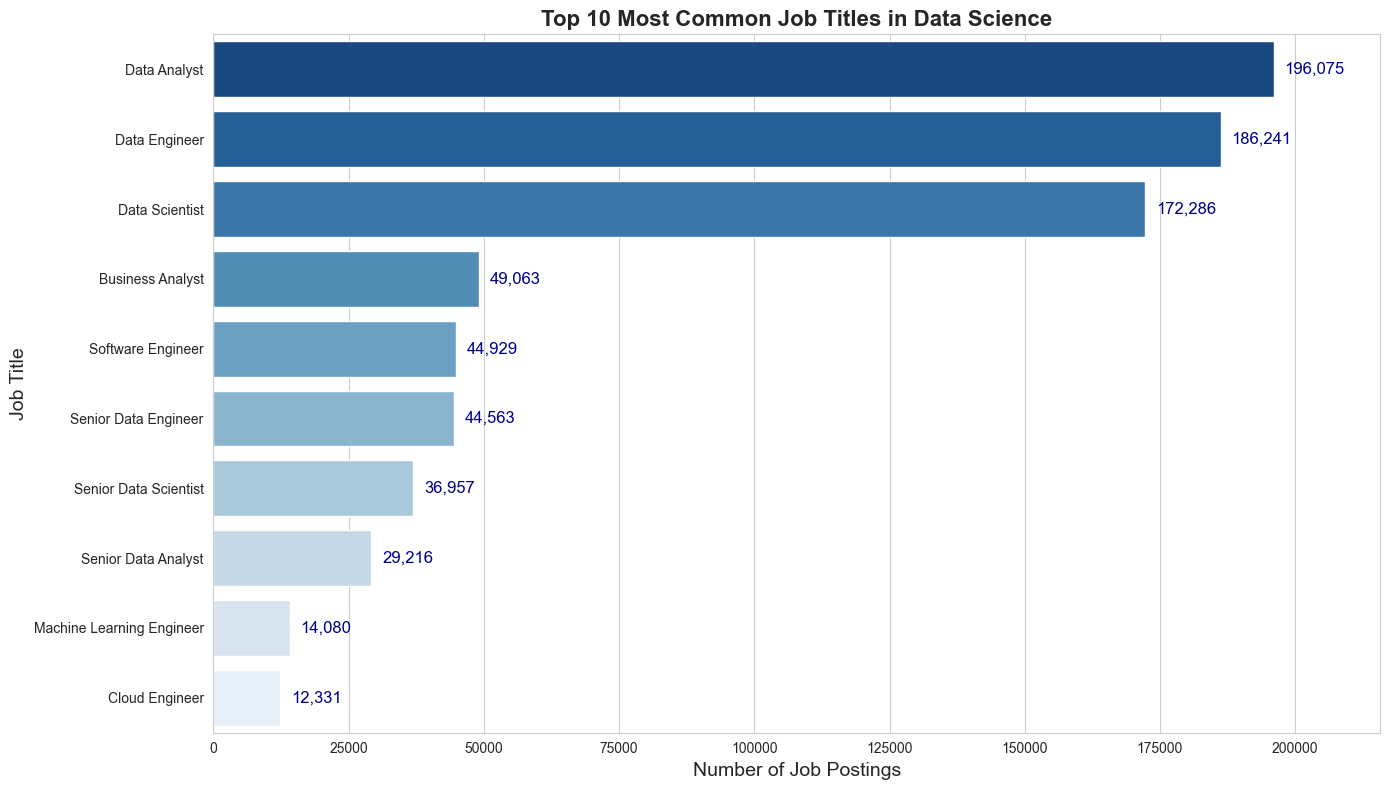

In [10]:
# Set figure size and style
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Create a horizontal bar plot with a reversed blue color palette
colors = sns.color_palette("Blues_r", len(top_job_titles))
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette=colors)

# Title and axis labels with improved font sizes
plt.title('Top 10 Most Common Job Titles in Data Science', fontsize=16, fontweight='bold')
plt.xlabel('Number of Job Postings', fontsize=14)
plt.ylabel('Job Title', fontsize=14)

# Set x-axis limit to allow space for labels
plt.xlim(0, max(top_job_titles.values) * 1.1)
# Add data labels to each bar
for index, value in enumerate(top_job_titles.values):
    plt.text(
        value + max(top_job_titles.values) * 0.01,  # Position slightly to the right of the bar
        index,
        f"{value:,}",  # Format as thousands
        va='center', 
        fontsize=12, 
        color='darkblue'
    )

# Optimize layout to reduce whitespace
plt.tight_layout()

# Display the plot
plt.show()

In [12]:
# Trend Analysis 2: Distribution of Jobs by Country
top_countries = df_non_salary['job_country'].value_counts().head(10)
top_countries

job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
Spain              25100
Singapore          23696
Sudan              21781
Netherlands        20631
Italy              17013
Name: count, dtype: int64

C:\Users\alex_\AppData\Local\Temp\ipykernel_7112\626361558.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette=colors)


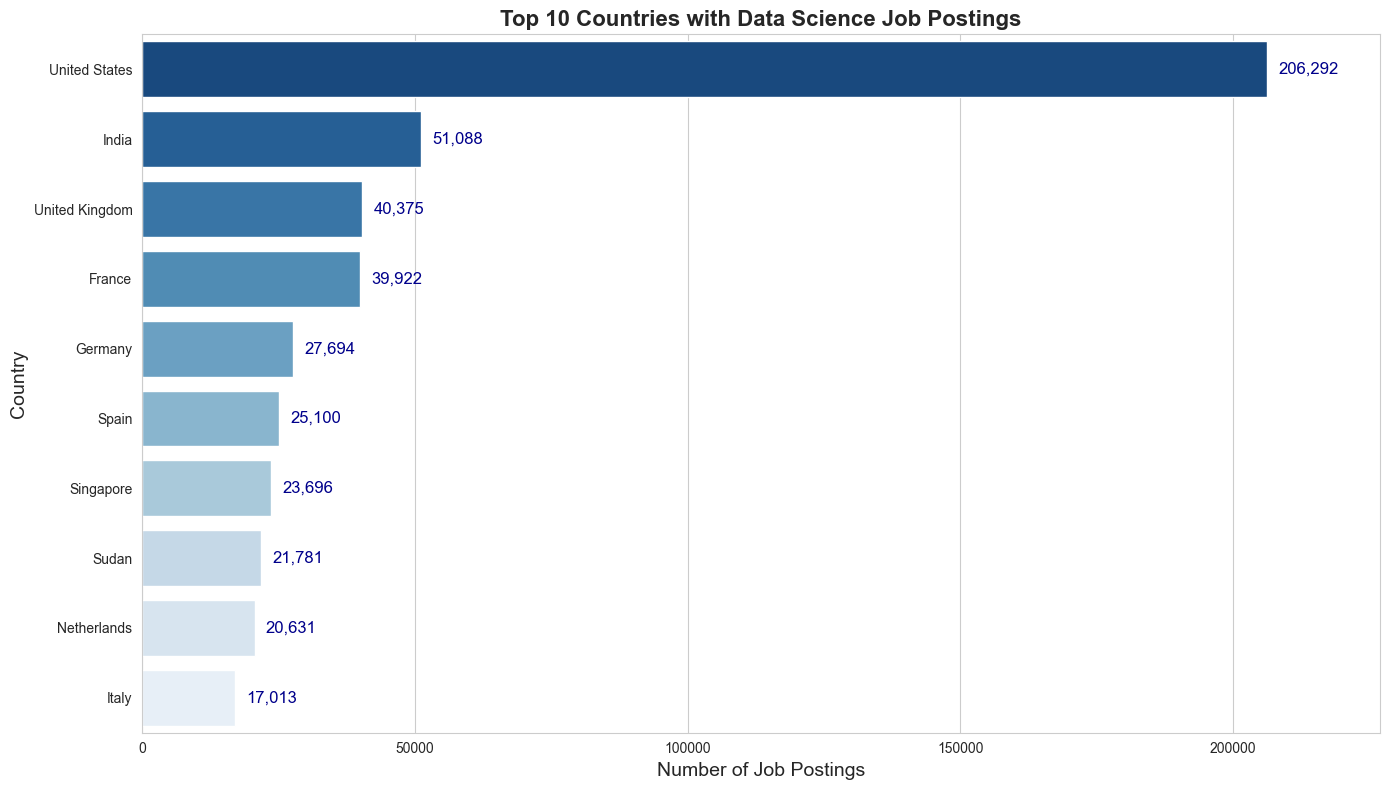

In [13]:
# Set figure size and style
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Create a horizontal bar plot with reversed blue color palette
colors = sns.color_palette("Blues_r", len(top_countries))
sns.barplot(x=top_countries.values, y=top_countries.index, palette=colors)

# Title and axis labels with enhanced font sizes
plt.title('Top 10 Countries with Data Science Job Postings', fontsize=16, fontweight='bold')
plt.xlabel('Number of Job Postings', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Set x-axis limit to allow space for labels
plt.xlim(0, max(top_countries) * 1.1)
# Add data labels to each bar
for index, value in enumerate(top_countries.values):
    plt.text(
        value + max(top_countries.values) * 0.01,  # Position label slightly to the right of the bar
        index,
        f"{value:,}",  # Format as thousands
        va='center',
        fontsize=12,
        color='darkblue'
    )

# Optimize layout to reduce whitespace
plt.tight_layout()

# Display the plot
plt.show()

In [13]:
# Trend Analysis 3: Work-from-Home Opportunities
work_from_home_count = df_non_salary['job_work_from_home'].value_counts()
work_from_home_count

job_work_from_home
False    716189
True      69552
Name: count, dtype: int64

In [14]:
# Defining the counts for work-from-home and on-site jobs
work_from_home_count_false = 716189
work_from_home_count_true = 69552

# Calculating the ratio of False (on-site) to True (work-from-home)
ratio_false_to_true = work_from_home_count_false / work_from_home_count_true

# Displaying the ratio
ratio_false_to_true


10.297173337934208

In [15]:
#This means that for every work-from-home job posting, there are about 10.3 on-site jobs available.
#This indicates that on-site positions are significantly more common in the dataset compared to work-from-home opportunities

C:\Users\alex_\AppData\Local\Temp\ipykernel_12916\1172398212.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=work_from_home_count.index, y=work_from_home_count.values, palette='Blues_r')


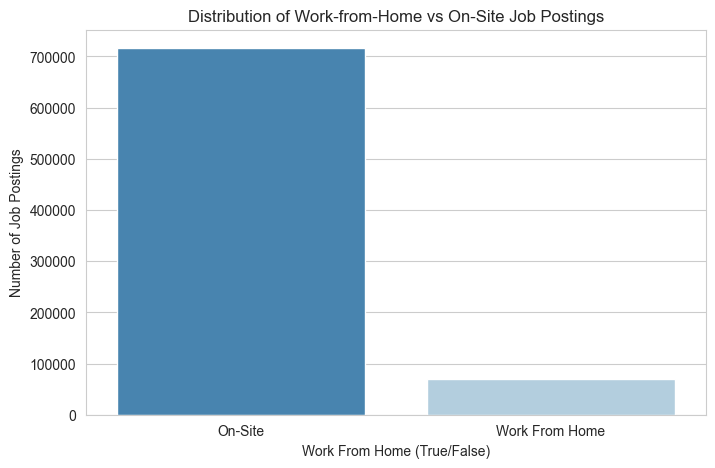

In [16]:
#Create a plot of the distribution of WFH vs On-Site Opportunities
plt.figure(figsize=(8, 5))
sns.barplot(x=work_from_home_count.index, y=work_from_home_count.values, palette='Blues_r')
plt.title('Distribution of Work-from-Home vs On-Site Job Postings')
plt.xlabel('Work From Home (True/False)')
plt.ylabel('Number of Job Postings')
plt.xticks([0, 1], ['On-Site', 'Work From Home'])
plt.show()

In [17]:
#Trend analysis 4: Job Schedule Type (Full Time vs Part Time)
job_schedule_type_count = df_non_salary["job_schedule_type"].value_counts().head(4)
job_schedule_type_count

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Part-time       7881
Name: count, dtype: int64

C:\Users\alex_\AppData\Local\Temp\ipykernel_12916\3330596467.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_schedule_types.values, y=filtered_schedule_types.index, palette='Blues_r')


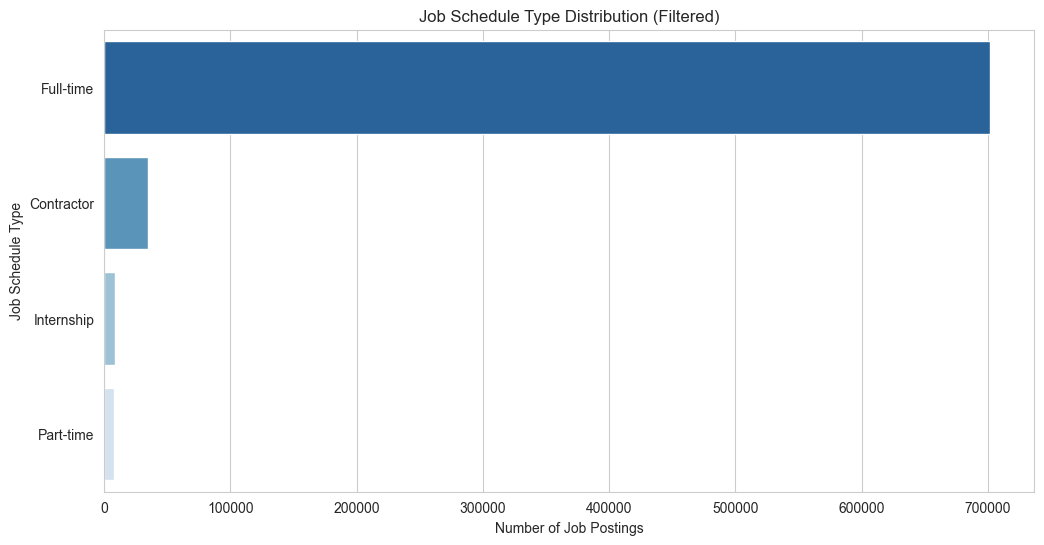

In [18]:
#Filtering Schedule Types:
filtered_schedule_types = df_non_salary['job_schedule_type'].value_counts()
filtered_schedule_types = filtered_schedule_types.loc[filtered_schedule_types.index.isin(['Full-time', 'Contractor', 'Internship', 'Part-time'])]

# Plotting the filtered Job Schedule Type Distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_schedule_types.values, y=filtered_schedule_types.index, palette='Blues_r')
plt.title('Job Schedule Type Distribution (Filtered)')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Schedule Type')
plt.show()


In [19]:
#Trend Analysis 5: Top Skills required
#Extract job skills, which are stored as strings of lists.

from collections import Counter
import ast

#Extract job skills, which are stored as strings of lists.
job_skills = df_non_salary["job_skills"].dropna().apply(lambda x: ast.literal_eval(x))
#Flattening All Skills into One List. This line is using a list comprehension to create a flat list (all_skills) of all the skills
all_skills = [skill for sublist in job_skills for skill in sublist] 
#Counting Skill frequency
skill_counts = Counter(all_skills).most_common(15)
skill_counts


[('sql', 384849),
 ('python', 380909),
 ('aws', 145381),
 ('azure', 132527),
 ('r', 130892),
 ('tableau', 127213),
 ('excel', 127018),
 ('spark', 114609),
 ('power bi', 98147),
 ('java', 85612),
 ('sas', 83404),
 ('hadoop', 64842),
 ('scala', 56886),
 ('snowflake', 55015),
 ('databricks', 53182)]

C:\Users\alex_\AppData\Local\Temp\ipykernel_12916\3373672311.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[i[1] for i in skill_counts], y=[i[0] for i in skill_counts], palette='Blues_r')


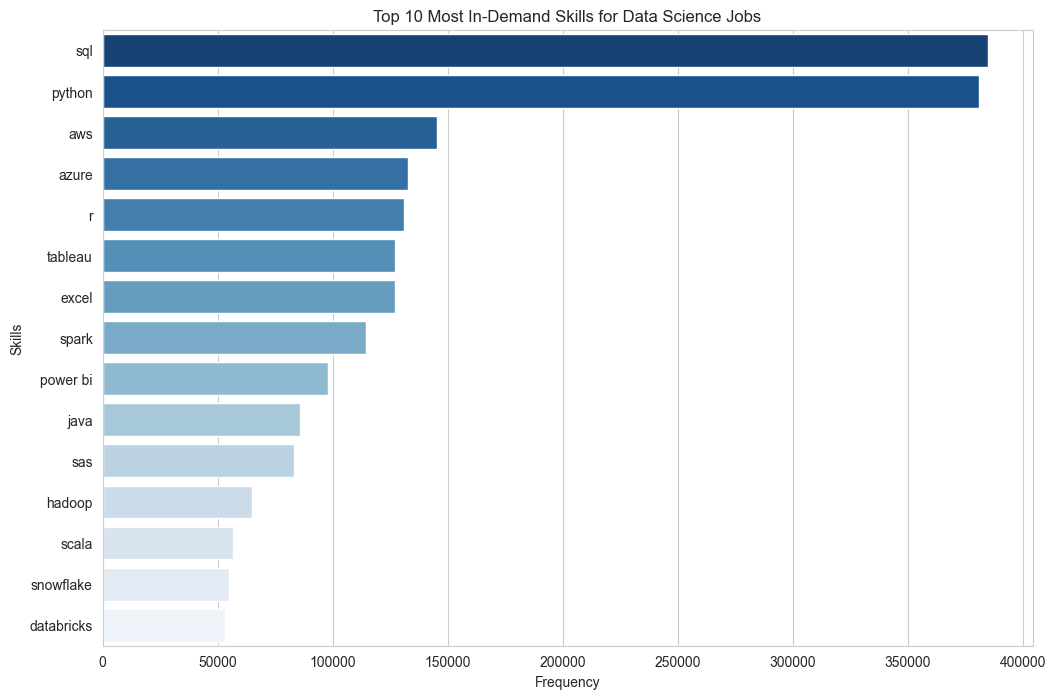

In [20]:
#Visualizing the top #15 skills: 
plt.figure(figsize=(12, 8))
sns.barplot(x=[i[1] for i in skill_counts], y=[i[0] for i in skill_counts], palette='Blues_r')
plt.title('Top 10 Most In-Demand Skills for Data Science Jobs')
plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.show()


In [21]:
!pip install geopandas

In [22]:
import geopandas as gpd

In [23]:
#Aggregating the number of job postings by country
job_country_df = df_non_salary['job_country'].value_counts().reset_index

# Aggregating the number of job postings by country
job_country_df = data_jobs_df['job_country'].value_counts().reset_index()
job_country_df.columns = ['country', 'job_postings']
job_country_df.head(10)

,country,job_postings
0,United States,206292
1,India,51088
2,United Kingdom,40375
3,France,39922
4,Germany,27694
5,Spain,25100
6,Singapore,23696
7,Sudan,21781
8,Netherlands,20631
9,Italy,17013


In [24]:
import pandas as pd
import plotly.express as px
import numpy as np

# Aggregate job postings by country
job_country_counts = data_jobs_df['job_country'].value_counts().reset_index()
job_country_counts.columns = ['country', 'job_postings']

# Apply a logarithmic transformation to the job postings for a more balanced color scale
job_country_counts['log_job_postings'] = np.log1p(job_country_counts['job_postings'])  # log(1 + x) to avoid -inf for 0s

# Plotting the world map with a logarithmic color scale
fig = px.choropleth(
    job_country_counts,
    locations="country",
    locationmode="country names",
    color="log_job_postings",
    color_continuous_scale="Blues",
    labels={'log_job_postings': 'Log Job Postings'},
    title='Distribution of Data Science Job Postings by Country (Log Scale)'
)

# Update layout for a better view
fig.update_geos(
    projection_type="natural earth",
    showcoastlines=True,
    coastlinecolor="Gray",
    showland=True,
    landcolor="lightgrey"
)

# Display the plot
fig.show()


In [26]:
import folium
import pandas as pd
import numpy as np
import json
import requests


# Aggregating the number of job postings by country
job_country_df = data_jobs_df['job_country'].value_counts().reset_index()
job_country_df.columns = ['country', 'job_postings']

# Correct potential country name mismatches
job_country_df['country'] = job_country_df['country'].replace({
    'United States': 'United States of America'
})

# Create a new column with the logarithmic values of job postings for color representation
job_country_df['log_job_postings'] = job_country_df['job_postings'].apply(lambda x: np.log1p(x))

# Load GeoJSON data for countries
geo_json_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'
geo_json_data = json.loads(requests.get(geo_json_url).text)

# Merge job postings data into the GeoJSON properties
for feature in geo_json_data['features']:
    country_name = feature['properties']['name']
    matching_data = job_country_df[job_country_df['country'] == country_name]
    
    if not matching_data.empty:
        feature['properties']['job_postings'] = int(matching_data['job_postings'])
    else:
        feature['properties']['job_postings'] = 'No data'

# Create a base world map using Folium
world_map = folium.Map(location=[20.0, 0.0], zoom_start=2)

# Adding choropleth layer for job postings using logarithmic values for visualization
folium.Choropleth(
    geo_data=geo_json_data,
    name='choropleth',
    data=job_country_df,
    columns=['country', 'log_job_postings'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name=None  # Remove the default legend
).add_to(world_map)

# Adding tooltips to display real values with the choropleth layer
folium.GeoJson(
    geo_json_data,
    style_function=lambda x: {'fillColor': '#00000000', 'color': '#00000000', 'weight': 0},  # Style to make this layer invisible
    tooltip=folium.GeoJsonTooltip(
        fields=['name', 'job_postings'],
        aliases=['Country:', 'Job Postings:'],
        localize=True
    )
).add_to(world_map)

# Custom Legend HTML to show the real number of job postings
legend_html = '''
<div style="position: fixed;
            bottom: 50px; left: 50px; width: 350px; height: 220px;
            background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
            padding: 15px;">
    <b>Number of Data Science Job Postings</b><br>
    <i>Color gradient represents log scale, but numbers reflect real values</i><br>
    <div style="background-color: #f7fbff; width: 20px; height: 20px; display: inline-block;"></div> 1 - 100<br>
    <div style="background-color: #c6dbef; width: 20px; height: 20px; display: inline-block;"></div> 101 - 1,000<br>
    <div style="background-color: #6baed6; width: 20px; height: 20px; display: inline-block;"></div> 1,001 - 10,000<br>
    <div style="background-color: #2171b5; width: 20px; height: 20px; display: inline-block;"></div> 10,001 - 100,000<br>
    <div style="background-color: #084594; width: 20px; height: 20px; display: inline-block;"></div> 100,001+<br>
</div>
'''

# Add the custom legend to the map
world_map.get_root().html.add_child(folium.Element(legend_html))

# Add a layer control to toggle the choropleth
folium.LayerControl().add_to(world_map)

# Save the map to an HTML file
world_map.save('world_job_postings_map_with_bigger_legend.html')


C:\Users\alex_\AppData\Local\Temp\ipykernel_12916\1516463431.py:30: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



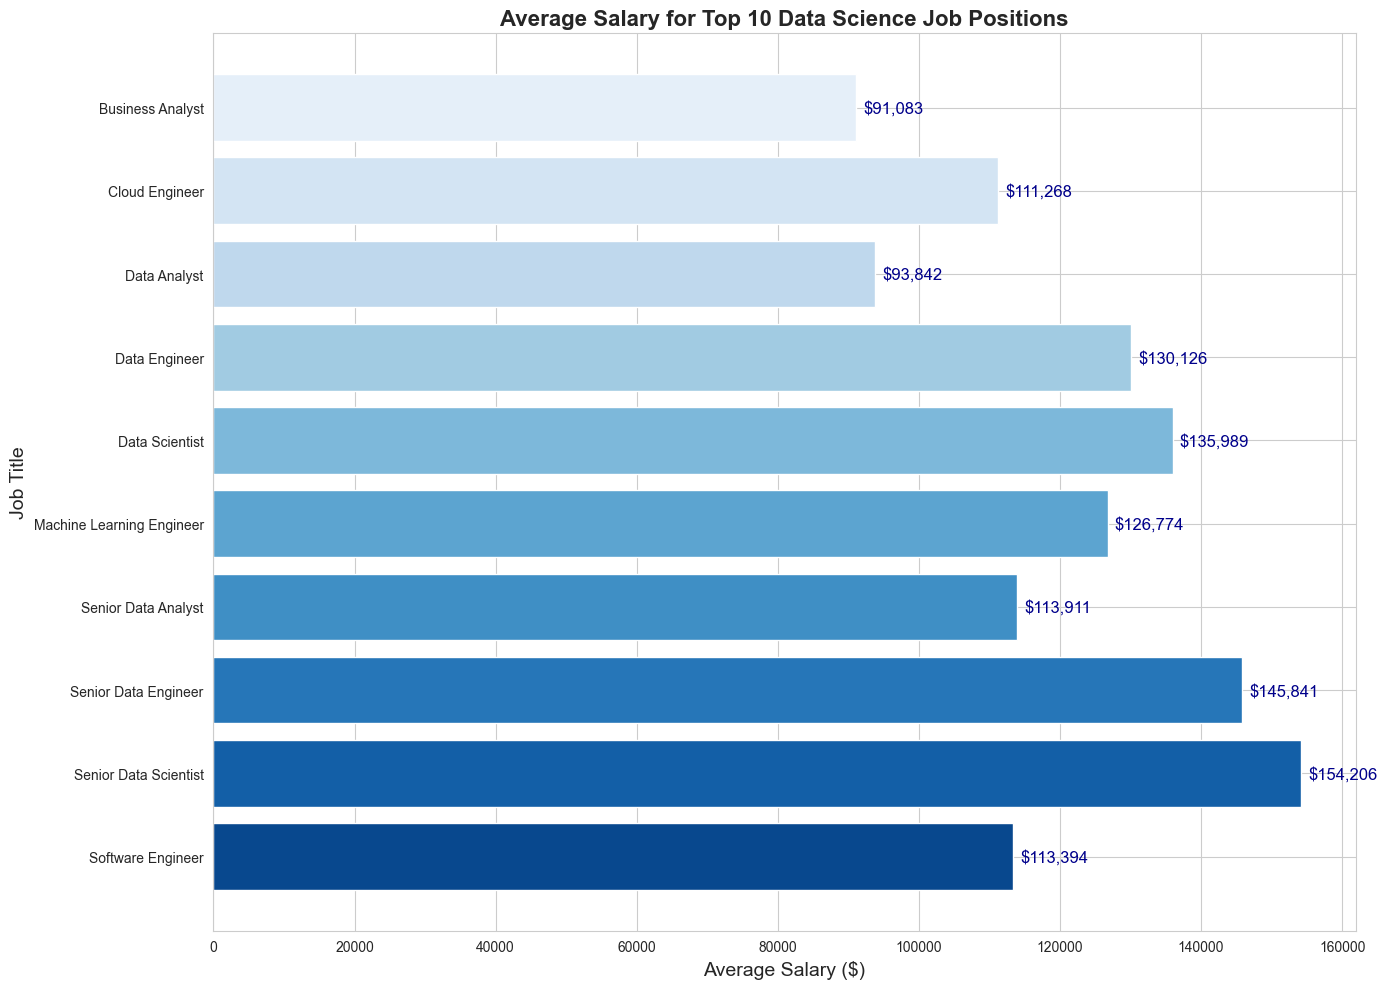

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify the Top 10 Most Common Job Positions using 'job_title_short'
top_10_jobs = data_jobs_df['job_title_short'].value_counts().head(10).reset_index()
top_10_jobs.columns = ['job_title_short', 'count']

# Step 2: Filter Data for Only the Top 10 Job Titles
top_10_jobs_data = data_jobs_df[data_jobs_df['job_title_short'].isin(top_10_jobs['job_title_short'])]

# Step 3: Calculate Average Salary for Each Job Position using 'salary_year_avg'
avg_salary_by_job = top_10_jobs_data.groupby('job_title_short')['salary_year_avg'].mean().reset_index()
avg_salary_by_job.dropna(subset=['salary_year_avg'], inplace=True)
avg_salary_by_job.columns = ['job_title_short', 'average_salary']

# Step 4: Visualize the Average Salary for the Top 10 Job Titles
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

# Create a color gradient using seaborn's color palette, ensuring consistency with the 'skyblue' theme
colors = sns.color_palette("Blues", len(avg_salary_by_job))

# Create horizontal bar plot with gradient colors and labels for each bar
bars = plt.barh(avg_salary_by_job['job_title_short'], avg_salary_by_job['average_salary'], color=colors)
plt.xlabel('Average Salary ($)', fontsize=14)
plt.ylabel('Job Title', fontsize=14)
plt.title('Average Salary for Top 10 Data Science Job Positions', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()

# Add data labels to each bar
for bar in bars:
    plt.text(
        bar.get_width() + 1000,  # Position text slightly to the right of each bar
        bar.get_y() + bar.get_height() / 2,
        f"${bar.get_width():,.0f}",  # Format salary as a currency
        va='center', fontsize=12, color='darkblue'
    )

# Reduce the amount of empty space around the plot
plt.tight_layout()

plt.show()


In [ ]:
# Remove "via " prefix
data_jobs_df['job_via'] = data_jobs_df['job_via'].str.replace("via ", "")

# Let's identify what are the most used job platforms for Data Science jobs:
top_job_platforms = data_jobs_df['job_via'].value_counts().head(5)
top_job_platforms

job_via
LinkedIn       186679
BeBee          103507
Trabajo.org     61562
Indeed          42756
Recruit.net     23646
Name: count, dtype: int64

C:\Users\alex_\AppData\Local\Temp\ipykernel_21580\787507992.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




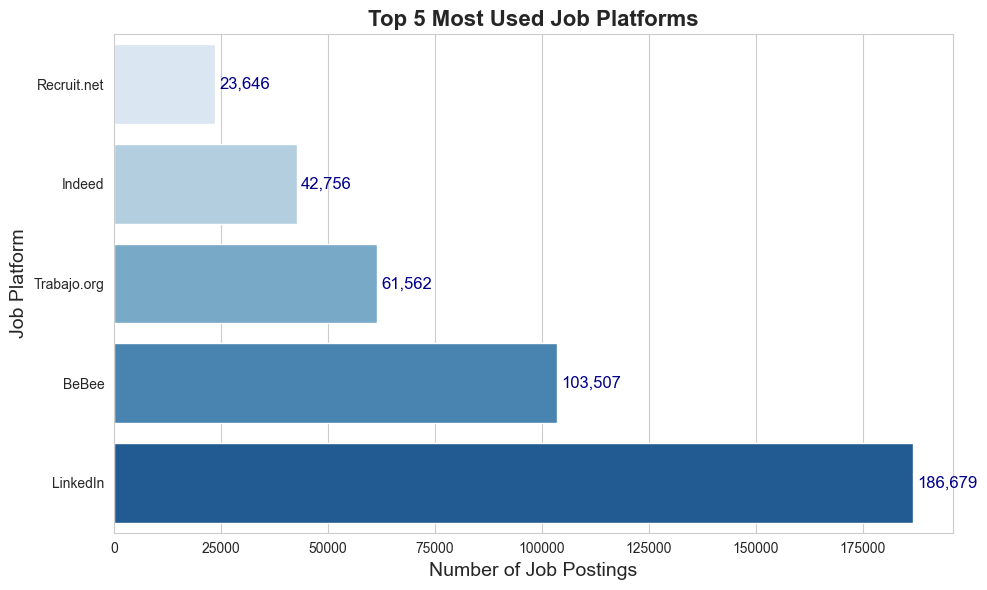

In [ ]:
# Recompute 'top_job_platforms' to ensure it is correctly defined as requested by the user
top_job_platforms = data_jobs_df['job_via'].value_counts().head(5).sort_values(ascending=True)

# Set plot style and size
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create a horizontal bar plot
sns.barplot(x=top_job_platforms.values, y=top_job_platforms.index, palette="Blues")

# Title and axis labels
plt.title("Top 5 Most Used Job Platforms", fontsize=16, fontweight='bold')
plt.xlabel("Number of Job Postings", fontsize=14)
plt.ylabel("Job Platform", fontsize=14)

# Add data labels to each bar
for index, value in enumerate(top_job_platforms.values):
    plt.text(value + 1000, index, f"{value:,}", va='center', fontsize=12, color='darkblue')

# Display the plot
plt.tight_layout()
plt.show()

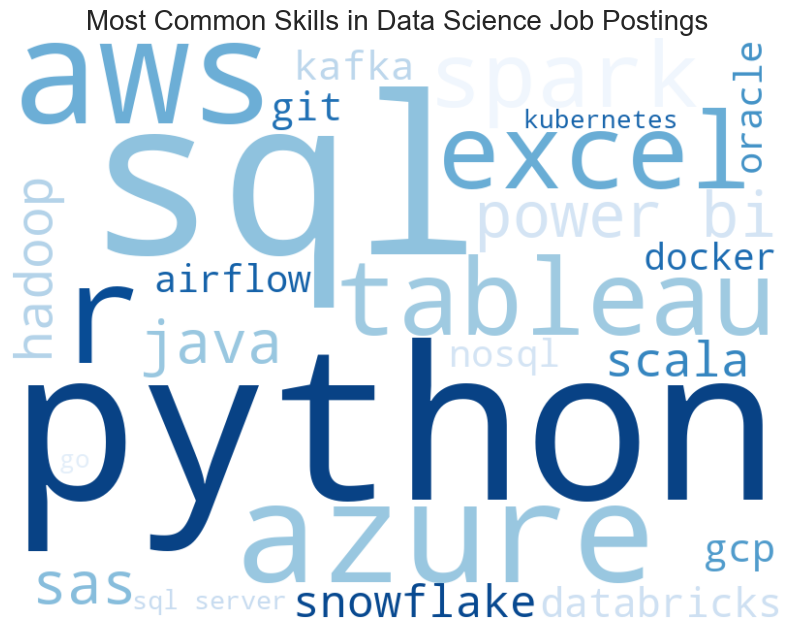

In [ ]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Fill any NaN values in the 'job_skills' column with an empty string
data_jobs_df['job_skills'] = data_jobs_df['job_skills'].fillna('')

# Clean each skill entry by removing brackets, single quotes, and whitespace, then split and explode
skills_series = (
    data_jobs_df['job_skills']
    .str.replace(r"[\[\]']", "", regex=True)  # Remove brackets and single quotes
    .str.split(',')                          # Split each list into individual skills
    .explode()                               # Flatten to create a series of skills
    .str.strip()                             # Remove leading and trailing whitespace
    .str.lower()                             # Convert to lowercase to normalize
)

# Remove any completely empty entries
skills_series = skills_series[skills_series != '']

# Count occurrences of each unique skill
skill_counts = Counter(skills_series)

# Generate a word cloud from the frequency dictionary
wordcloud = WordCloud(width=800, height=600, background_color='white', colormap='Blues', max_words=25).generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Skills in Data Science Job Postings', fontsize=20)
plt.show()


region
Americas    31577
Europe      14033
Asia         6965
Name: count, dtype: int64


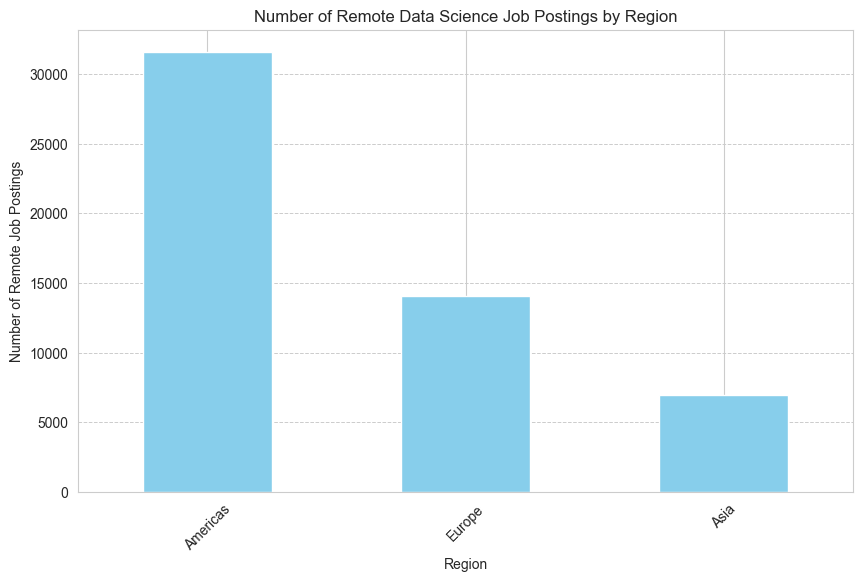

In [ ]:
# Step 1: Data Cleaning and Preparation
# Fill missing values in the job_work_from_home column with 'False' assuming if not specified, it's not remote
data_jobs_df['job_work_from_home'] = data_jobs_df['job_work_from_home'].fillna(False)

# Ensure job_work_from_home is a boolean type
data_jobs_df['job_work_from_home'] = data_jobs_df['job_work_from_home'].astype(bool)

# Step 2: Define Region Mapping for Countries
country_to_region = {
    # Americas
    'United States': 'Americas', 'Canada': 'Americas', 'Brazil': 'Americas',
    'Argentina': 'Americas', 'Chile': 'Americas', 'Colombia': 'Americas',
    'Mexico': 'Americas', 'Peru': 'Americas',

    # Europe
    'Germany': 'Europe', 'France': 'Europe', 'United Kingdom': 'Europe',
    'Italy': 'Europe', 'Spain': 'Europe', 'Netherlands': 'Europe',
    'Belgium': 'Europe', 'Sweden': 'Europe', 'Norway': 'Europe',
    'Poland': 'Europe', 'Switzerland': 'Europe', 'Czechia': 'Europe',

    # Asia-Pacific
    'China': 'Asia', 'India': 'Asia', 'Japan': 'Asia',
    'Australia': 'Asia', 'South Korea': 'Asia', 'Singapore': 'Asia'
}

# Map countries to their respective regions
data_jobs_df['region'] = data_jobs_df['job_country'].map(country_to_region)

# Filter only rows where region is defined (ignore NaNs)
data_jobs_df = data_jobs_df.dropna(subset=['region'])

# Step 3: Analyze Remote Job Postings by Region
remote_jobs = data_jobs_df[data_jobs_df['job_work_from_home'] == True]
remote_jobs_count_by_region = remote_jobs['region'].value_counts()

# Display the number of remote job postings by region
print(remote_jobs_count_by_region)

# Step 4: Visualize the Results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
remote_jobs_count_by_region.plot(kind='bar', color='skyblue')
plt.title('Number of Remote Data Science Job Postings by Region')
plt.xlabel('Region')
plt.ylabel('Number of Remote Job Postings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

In [ ]:
# Define a more complete mapping for countries to continents
continent_mapping = {
    # Americas
    'United States': 'Americas', 'Canada': 'Americas', 'Brazil': 'Americas', 'Argentina': 'Americas',
    'Chile': 'Americas', 'Mexico': 'Americas', 'Colombia': 'Americas', 'Peru': 'Americas',
    
    # Europe
    'Germany': 'Europe', 'United Kingdom': 'Europe', 'France': 'Europe', 'Spain': 'Europe', 'Italy': 'Europe',
    'Netherlands': 'Europe', 'Belgium': 'Europe', 'Sweden': 'Europe', 'Norway': 'Europe', 'Poland': 'Europe',
    'Switzerland': 'Europe', 'Austria': 'Europe', 'Ireland': 'Europe', 'Finland': 'Europe', 'Denmark': 'Europe',
    'Portugal': 'Europe', 'Czechia': 'Europe', 'Greece': 'Europe', 'Hungary': 'Europe', 'Slovakia': 'Europe',
    'Romania': 'Europe', 'Bulgaria': 'Europe', 'Croatia': 'Europe',
    
    # Asia
    'India': 'Asia', 'China': 'Asia', 'Japan': 'Asia', 'Australia': 'Asia', 'South Korea': 'Asia',
    'Singapore': 'Asia', 'Thailand': 'Asia', 'Malaysia': 'Asia', 'Indonesia': 'Asia', 'Vietnam': 'Asia',
    'Pakistan': 'Asia', 'Bangladesh': 'Asia', 'Philippines': 'Asia',
    
    # Oceania
    'Australia': 'Oceania', 'New Zealand': 'Oceania',
    
    # Africa
    'South Africa': 'Africa', 'Nigeria': 'Africa', 'Kenya': 'Africa', 'Egypt': 'Africa',
    'Morocco': 'Africa', 'Ghana': 'Africa', 'Ethiopia': 'Africa', 'Uganda': 'Africa', 'Tanzania': 'Africa',
    'Algeria': 'Africa', 'Tunisia': 'Africa', 'Angola': 'Africa'
}

# Apply this updated mapping in the script to assign continent to each job
# (assuming the previous dataset and analysis steps are applied)



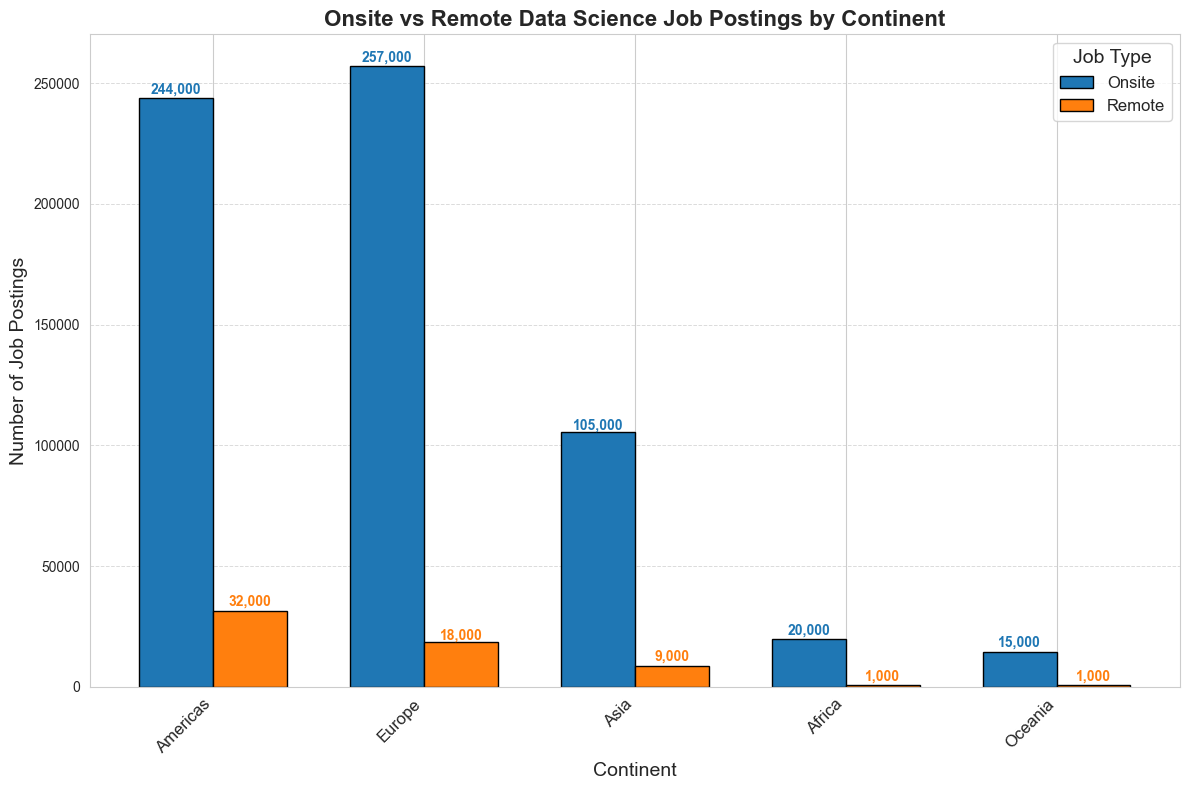

In [ ]:


# Assuming the rest of the previous script is executed and we have onsite_remote_df, x, width already defined

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Plot onsite and remote bars side by side for each continent
onsite_bars = ax.bar(x - width/2, onsite_remote_df['Onsite'], width, label='Onsite', color='#1f77b4', edgecolor='black')
remote_bars = ax.bar(x + width/2, onsite_remote_df['Remote'], width, label='Remote', color='#ff7f0e', edgecolor='black')

# Add titles and labels
ax.set_title('Onsite vs Remote Data Science Job Postings by Continent', fontsize=16, weight='bold')
ax.set_xlabel('Continent', fontsize=14)
ax.set_ylabel('Number of Job Postings', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(onsite_remote_df.index, rotation=45, ha='right', fontsize=12)
ax.legend(title="Job Type", fontsize=12, title_fontsize=14)

# Display grid for y-axis
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Add numbers on top of each bar, rounded to the nearest thousand
for bar in onsite_bars:
    height = round(bar.get_height(), -3)  # Round to the nearest thousand
    ax.text(bar.get_x() + bar.get_width() / 2, height + 500, f'{int(height):,}', ha='center', va='bottom', fontsize=10, weight='bold', color='#1f77b4')

for bar in remote_bars:
    height = round(bar.get_height(), -3)  # Round to the nearest thousand
    ax.text(bar.get_x() + bar.get_width() / 2, height + 500, f'{int(height):,}', ha='center', va='bottom', fontsize=10, weight='bold', color='#ff7f0e')

# Tight layout for spacing
plt.tight_layout()

# Show the plot
plt.show()



In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

# Set up Selenium WebDriver using WebDriver Manager
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# Open the webpage
url = "https://edurank.org/cs/data-science/"
driver.get(url)

# Extract data using XPath for all top 20 universities
ranking_names = driver.find_elements(By.XPATH, '/html/body/div/div/main/div[2]/div[1]/div/div/h2')
countries = driver.find_elements(By.XPATH, '/html/body/div/div/main/div[2]/div[1]/div/div/div[1]')

# Extract the top 20 universities
data = []
for i in range(min(20, len(ranking_names))):
    rank = i + 1
    uni_name = ranking_names[i].text.strip()
    country = countries[i].text.strip()
    data.append({
        "Rank": rank,
        "University Name": uni_name,
        "Country": country
    })

# Close the driver
driver.quit()

# Create a DataFrame and save to CSV
df = pd.DataFrame(data)
df.to_csv('top_20_data_science_universities.csv', index=False)

print("Data has been saved to 'top_20_data_science_universities.csv'")


Data has been saved to 'top_20_data_science_universities.csv'


C:\Users\alex_\AppData\Local\Temp\ipykernel_12916\110034472.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




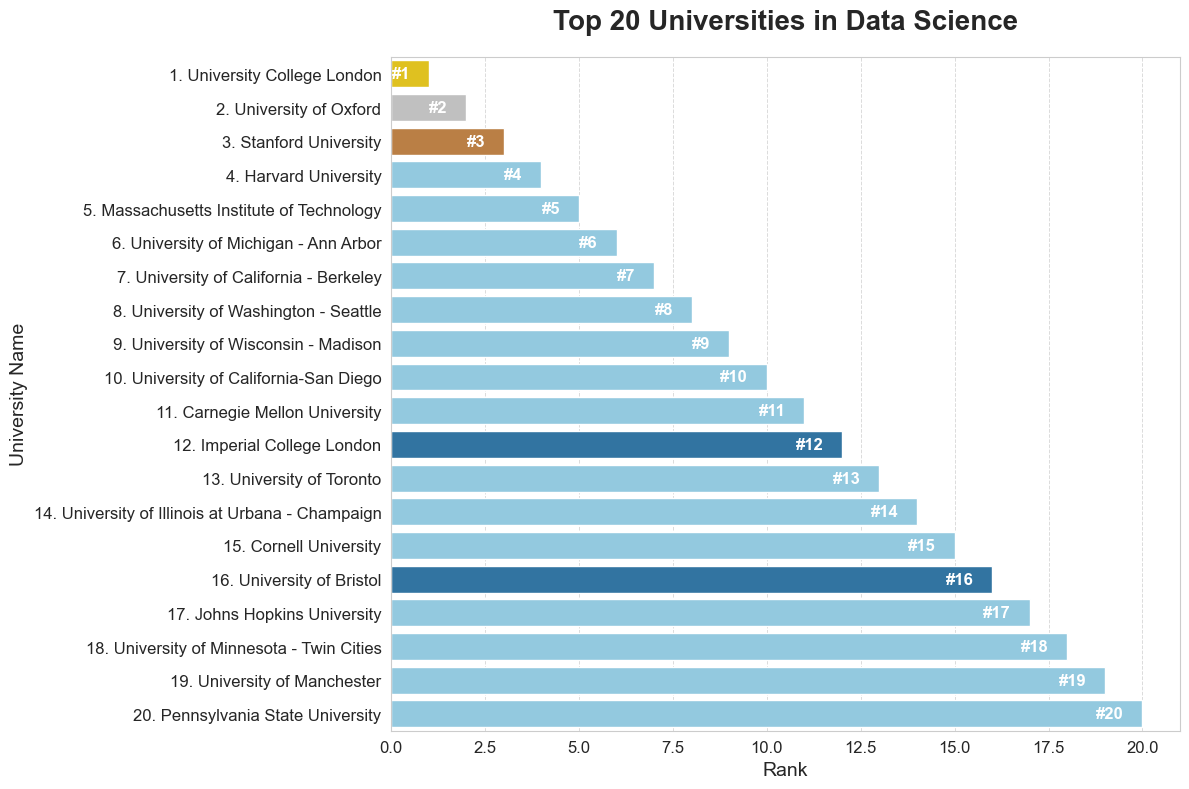

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file containing the top 20 universities in Data Science
file_path = 'top_20_data_science_universities.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Sort the data by rank for visualization
df = df.sort_values(by='Rank')

# Adding a new column to indicate regional differences
df['Region'] = df['University Name'].apply(lambda x: 'UK' if 'University College London' in x or 'Oxford' in x or 'Imperial' in x or 'Bristol' in x else 'US')

# Set color palette for regional differences and highlighting
palette = []
for index, row in df.iterrows():
    if row['Rank'] <= 3:  # Highlight the top 3 universities with gold, silver, bronze
        if row['Rank'] == 1:
            palette.append('#FFD700')  # Gold
        elif row['Rank'] == 2:
            palette.append('#C0C0C0')  # Silver
        elif row['Rank'] == 3:
            palette.append('#CD7F32')  # Bronze
    else:
        if row['Region'] == 'UK':
            palette.append('#1f77b4')  # UK - Darker blue shade
        else:
            palette.append('#87CEEB')  # US - Light blue shade

# Plotting the horizontal bar chart with the new color coding
plt.figure(figsize=(12, 8))
sns.barplot(x='Rank', y='University Name', data=df, palette=palette, orient='h')

# Enhancing the visualization to make it more attractive
plt.title('Top 20 Universities in Data Science', fontsize=20, weight='bold', pad=20)
plt.xlabel('Rank', fontsize=14)
plt.ylabel('University Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Add rank numbers inside the bars for better presentation
for index, value in enumerate(df['Rank']):
    plt.text(value - 0.5, index, f'#{value}', color='white', va='center', ha='right', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()


![Salaries_comparison_US_vs_UK](UK_vs_US_data_science_job_salaries.jpg)


**US Data Scientists are considerably more expensive to hire compared to their UK counterparts. This is likely reflective of several factors, including higher demand for tech roles, a larger tech ecosystem, and higher cost of living in major US cities.**

**If budget considerations are a primary concern, hiring in the UK could provide a cost-effective solution for acquiring similar skills at a lower salary expense.**

**Besides salary, consider factors like relocation, taxes, and benefits. The UK may offer other indirect financial advantages when considering the total cost of employment compared to the US, where benefits are typically expensive.**

![table_1](table_1.jpg)


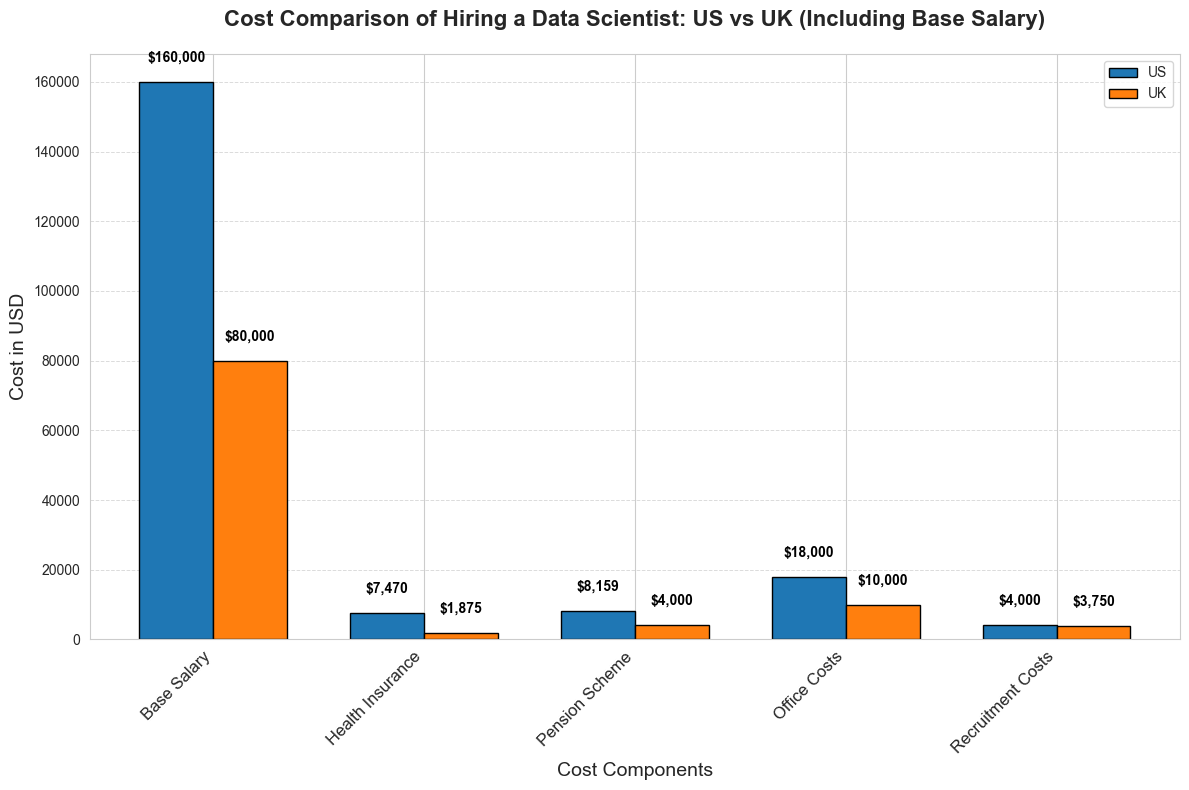

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define categories and costs for the analysis (updated including base compensation)
categories = ['Base Salary', 'Health Insurance', 'Pension Scheme', 'Office Costs', 'Recruitment Costs']
us_costs = [160000, 7470, 160000 * 0.051, 18000, 4000]  # Base salary + updated costs (Pension calculated as 5.1% of salary)
uk_costs = [80000, 1875, 80000 * 0.05, 10000, 3750]     # Base salary + updated costs (Pension calculated as 5% of salary)

# Create a numpy array for positions on x-axis
x = np.arange(len(categories))

# Define the width of the bars
width = 0.35

# Plotting the bar chart with labels
fig, ax = plt.subplots(figsize=(12, 8))
us_bars = ax.bar(x - width/2, us_costs, width, label='US', color='#1f77b4', edgecolor='black')
uk_bars = ax.bar(x + width/2, uk_costs, width, label='UK', color='#ff7f0e', edgecolor='black')

# Adding labels on top of each bar for the value
for bar in us_bars:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5000, f'${int(bar.get_height()):,}', 
            ha='center', va='bottom', fontsize=10, color='black', weight='bold')

for bar in uk_bars:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5000, f'${int(bar.get_height()):,}', 
            ha='center', va='bottom', fontsize=10, color='black', weight='bold')

# Set chart labels and title
ax.set_ylabel('Cost in USD', fontsize=14)
ax.set_xlabel('Cost Components', fontsize=14)
ax.set_title('Cost Comparison of Hiring a Data Scientist: US vs UK (Including Base Salary)', fontsize=16, weight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12, rotation=45, ha='right')
ax.legend()

# Display grid for y-axis for better readability
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
